## All python Imports

In [1]:
# Normal Sci. Comp. Imports
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
# create random number generator for later/throughout
rng = np.random.default_rng(seed=120695)
# Load the keras data set module:
from tensorflow.keras.datasets import fashion_mnist
# import keras stuff
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Function for Prediction Stats

In [2]:
def mis_cls_stats(prds:np.array, truth:np.array):
    """ Identify some statistics about the misclassifications like what was mis classifided 
        how many times it was misclassifed, what was most often classified for incorrectly
        for it, etc.
        prds = predictions
        truth = true labels
    """
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    # get number of sample/test
    M = truth.shape[0]
    # number of correct and wrong predictions
    num_r, num_w = np.sum(prds==truth), np.count_nonzero(prds-truth)
    print(f"The model gave {num_r} correct and {num_w} wrong predictions giving")
    print(f"an accuracy rate of {(num_r)/M} and an error rate of {(num_w)/M} \n")
    # first get the indices of the predictions matrix that were incorrect
    idx = np.nonzero(prds!=truth)[0]
    # now get all the labels that were miss classified and how many times so (counts_wrong)
    lbls, counts_w = np.unique(prds[idx], return_counts=True)
    # also get the correct number of labels and simplify the classes list
    counts_c = np.empty_like(counts_w)
    usd_cls = []
    for i in range(len(counts_w)):
        counts_c[i] = np.sum(truth == lbls[i])
        usd_cls.append(class_names[lbls[i]])
    # determine the individual class accuracies 
    cls_acc = 100*(1 - counts_w/counts_c)
    for i, l in enumerate(lbls):
        print(f"Label/class {class_names[l]} was miss labeled/classified {counts_w[i]} times")
        print(f"So approximately {100 *counts_w[i]/num_w:.2f}% of the misslabels were for {class_names[l]}")
        print(f"the accuracy rate for the {class_names[l]} alone was {cls_acc[i]:.2f}%\n")
        
    # plot horizonal bar char displaying misclassification per class
    fig1, ax1 = plt.subplots(figsize=(9,6))
    y_pos = np.arange(len(lbls))
    ax1.barh(y_pos, counts_w, align='center')
    ax1.set_yticks(y_pos, labels=usd_cls)
    ax1.set_xlabel('Miss Classifications')
    ax1.set_title(f'Num. Misclassifications For Model - Total = {num_w}')
    # Now create a verical bar chart for each class showing what was the miss classifications 
    # maximum of 20 sub figures and minimum of 2 (realistically going to have some misclassif.)
    num_cols = 2
    num_images = 2*len(lbls)
    num_rows = int(np.ceil(num_images/4))
    # plots is an example image of a label/class then its misclassification charts of what was 
    # predicted instead of it and some other things. Us two images per class and we want for 
    # images per row. 
    fig, ax = plt.subplots(num_rows, 2*num_cols, figsize=(2.5*2*num_cols, 2*num_rows))
    # tmp_img = np.empty((28,28), dtype=float)
    for i, l in enumerate(lbls):
        i_r, i_c = int(i/2), 0
        if i%2==1:
            i_c = 2
        # first display an image of the label
        jdx = np.nonzero(truth == l)[0][0]
        ax[i_r][i_c].set_xticks([])
        ax[i_r][i_c].set_yticks([])
        ax[i_r][i_c].imshow(x_test[jdx].reshape(28,28), cmap='gray')
        ax[i_r][i_c].set_xlabel(f"{class_names[l]}, {cls_acc[i]:.2f}% Acc.", fontsize=9)
        # now display bar chart of what was predicted instead
        ids = np.nonzero(prds[idx]==l)
        gues, g_counts = np.unique(truth[idx[ids]], return_counts=True)
        ax[i_r][i_c+1].bar(range(len(gues)), g_counts, align='center', color='red')
        ax[i_r][i_c+1].set_ylabel('Amount', fontsize=9)
        ax[i_r][i_c+1].set_xlabel('Wrong Predictions', fontsize=9)
        g_lbl = []
        for i in range(len(gues)):
            g_lbl.append(class_names[gues[i]])
        ax[i_r][i_c+1].set_xticks(range(len(gues)), g_lbl, fontsize=6.5, rotation=65)
        ax[i_r][i_c+1].set_title(f"{class_names[l]}, Misclassifications", fontsize=9)
        
    plt.tight_layout()
    plt.show()

## Data importing and then Normalization, etc

In [3]:
# with fashion mnist model data is already partitioned into training and validation
(X, Y), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_valid = X[:48000], X[48000:]
y_train, y_valid = Y[:48000], Y[48000:]
# Reshape and Normalize the data
x_train = x_train.reshape(-1, 784)
x_valid = x_valid.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
norm_tr = x_train / 255
norm_va = x_valid / 255
norm_tst = x_test / 255
# Categorically encode the data (one-hot encoding)
num_categories = len(np.unique(y_train))
y_tr_encoded = keras.utils.to_categorical(y_train, num_categories)
y_va_encoded = keras.utils.to_categorical(y_valid, num_categories)
y_tst_encoded = keras.utils.to_categorical(y_test, num_categories)

## Data matrix and looping Variables

In [4]:
batches= 2**np.arange(0, 12)
g_data = np.empty(shape=(12,2))
out_data = np.empty(shape=(24,10))
opt = keras.optimizers.Adam(learning_rate=0.001)

## Loop to Create and Train the Model with 2 hidden layers only - Save data each pass

In [5]:
for i in range(12):
    # create a new model in each time through the loop
    model2 = Sequential() 
    # input layer and first hidden layer
    model2.add(Dense(units=256, activation='relu', input_shape=(784,)))
    # second hidden layer
    model2.add(Dense(units=256, activation='relu',))
    # output layer
    model2.add(Dense(units=10, activation='softmax'))
    # now compile the models with the the correct loss, metrcs and optimzation method
    model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
    history2 = model2.fit(
        x=norm_tr, y=y_tr_encoded, batch_size=batches[i], epochs=10, verbose=0, validation_data=(norm_va, y_va_encoded)
    )
    # now trained save the validation and training accuracy results
    out_data[2*i] = history2.history['accuracy']
    out_data[2*i+1] = history2.history['val_accuracy']
    g_data[i, 0], g_data[i, 1] = history2.history['accuracy'][-1], history2.history['val_accuracy'][-1]
    if i != 11:
        del model2
    
out_data = out_data.T

## Save the training and validation accuracies over each epoch to txt file 

In [6]:
np.savetxt(fname='TF_datasets/FFNN_VarBatches_Acc_data.txt', X=out_data, header='(2) Tr Acc, - (2) Val Acc. - (3) Tr Acc. - (3) Val Acc. - ...')

## Make some predictions

The model gave 8726 correct and 1274 wrong predictions giving
an accuracy rate of 0.8726 and an error rate of 0.1274 

Label/class T-shirt/top was miss labeled/classified 221 times
So approximately 17.35% of the misslabels were for T-shirt/top
the accuracy rate for the T-shirt/top alone was 77.90%

Label/class Trouser was miss labeled/classified 28 times
So approximately 2.20% of the misslabels were for Trouser
the accuracy rate for the Trouser alone was 97.20%

Label/class Pullover was miss labeled/classified 311 times
So approximately 24.41% of the misslabels were for Pullover
the accuracy rate for the Pullover alone was 68.90%

Label/class Dress was miss labeled/classified 122 times
So approximately 9.58% of the misslabels were for Dress
the accuracy rate for the Dress alone was 87.80%

Label/class Coat was miss labeled/classified 202 times
So approximately 15.86% of the misslabels were for Coat
the accuracy rate for the Coat alone was 79.80%

Label/class Sandal was miss labeled/cla

<IPython.core.display.Javascript object>


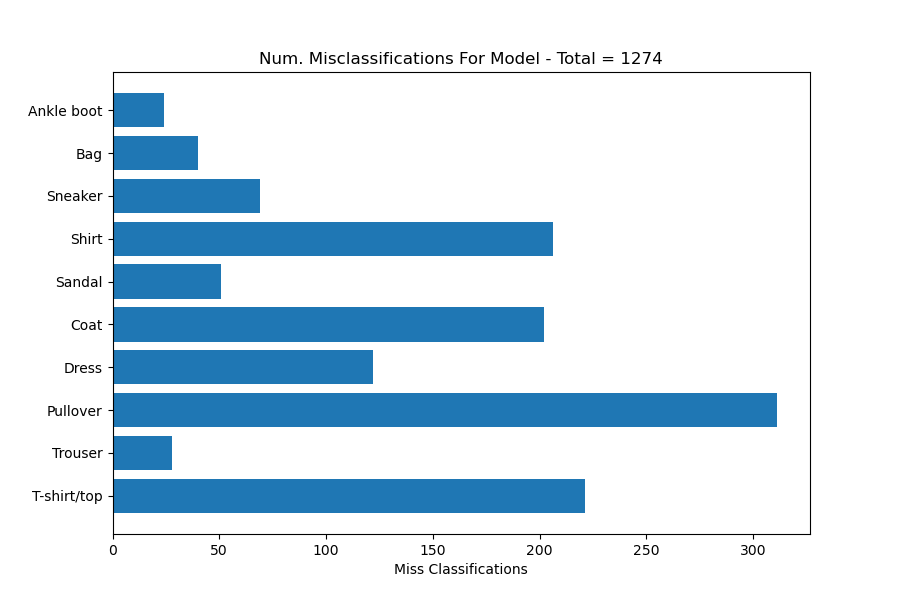

<IPython.core.display.Javascript object>


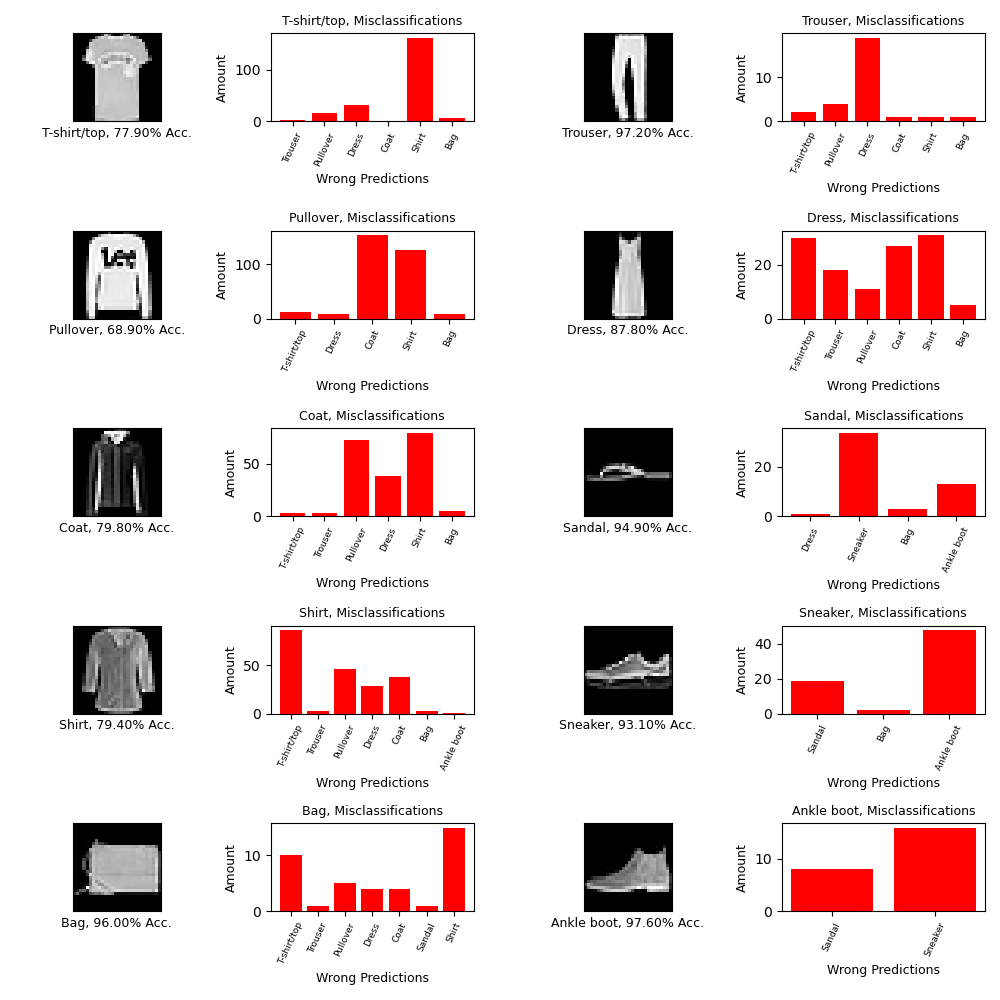

In [7]:
p2 = model2.predict(x=norm_tst)
preds2 = np.argmax(p2, axis=1)
mis_cls_stats(preds2, y_test)

## Extra:
A separate notebook takes the data saved above to create a plot of the training and validation accuracy from one epoch to the next but if you want to display it here and save it to the current working directory copy and past the following lines of python code into a code cell and run it.
```Python
fig = plt.figure()
plt.semilogx(batches, g_data[:, 0]*100, 'k.--', batches, g_data[:, 1]*100, 'b.--', markersize=16)
plt.xlabel('Batch Size', fontsize=16)
plt.ylabel('% Accuracy', fontsize=16)
plt.legend(['Train', 'Validation'], fontsize=16)
plt.show()
plt.savefig(fname='Vary_Batches.png', format='png')
```

In [9]:
batches

array([   1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024,
       2048], dtype=int32)